# Projet "System Expert par IA"
Ce book se concentre sur le dataset `PCC_2006-2023_relevant_ordonné_analyse`.  
Ce dernier a déjà été pré-trié:
+ années : 2006 à 2023 compris

# Utilitaires

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
def missing_values_hitmap(dataframe):
    """
    Cette fonction permet d'afficher une heatmap de la distribution des valeurs nulles d'un dataframe pandas.
    """
    plt.figure(figsize=(10, 5))
    plt.title('Missing Values\n')
    sns.heatmap(dataframe.isnull(), cbar=False)
    plt.show()

# EDA

In [3]:
# Importer le dataframe
df = pd.read_csv("../PCC_2006-2023.csv", engine="python", sep=";")

In [4]:
df.head()

,id_avis,avis,poste,date,statut_système,titre_avis,code_poste,nom_poste,modèle,équipement,...,groupe_problème,code_panne,panne,texte_panne,texte_cause_2,code_ensemble_cause,ensemble_cause,code_cause,cause,texte_cause
0,65987101,659871,1,12-01-06,ACLO AIMP MARC OAFF TSUP,collision no 20 xl,T7028,Tram Nr 7028,T70,NaN,...,Incidents - Accidents,20.0,Collision,NaN,NaN,T7,QualificationTram,3,Collision Sans Blessé,NaN
1,66817701,668177,1,09-02-06,ACLO AIMP MARC OAFF TSUP,collision rapp.N°02 wol,T7028,Tram Nr 7028,T70,NaN,...,Incidents - Accidents,20.0,Collision,NaN,NaN,T7,QualificationTram,3,Collision Sans Blessé,NaN
2,67106601,671066,1,17-02-06,ACLO AIMP MARC OAFF TSUP,aanrijding verslag 31 sch,T7783,Tram 7783,T77,NaN,...,Incidents - Accidents,20.0,Collision,NaN,NaN,T7,QualificationTram,3,Collision Sans Blessé,NaN
3,67773701,677737,1,10-03-06,ACLO AIMP MARC OAFF TSUP,aanrijdingverslag 43 sch,T7749,Tram Nr 7749,T77,NaN,...,Incidents - Accidents,20.0,Collision,NaN,NaN,T7,QualificationTram,3,Collision Sans Blessé,NaN
4,67888001,678880,1,14-03-06,ACLO MARC OAFF TSUP,verslag aanrijding n°73 mol,T7045,Tram Nr 7045,T70,NaN,...,Incidents - Accidents,20.0,Collision,NaN,NaN,T7,QualificationTram,3,Collision Sans Blessé,4242a beschadigd


In [5]:
# Infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197871 entries, 0 to 197870
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_avis               197871 non-null  int64  
 1   avis                  197871 non-null  int64  
 2   poste                 197871 non-null  int64  
 3   date                  197871 non-null  object 
 4   statut_système        197871 non-null  object 
 5   titre_avis            197871 non-null  object 
 6   code_poste            197871 non-null  object 
 7   nom_poste             197871 non-null  object 
 8   modèle                197871 non-null  object 
 9   équipement            11337 non-null   object 
 10  nom_équipement        11337 non-null   object 
 11  article               11333 non-null   float64
 12  nom_article           11333 non-null   object 
 13  codage                197490 non-null  float64
 14  nom_codage            195846 non-null  object 
 15  

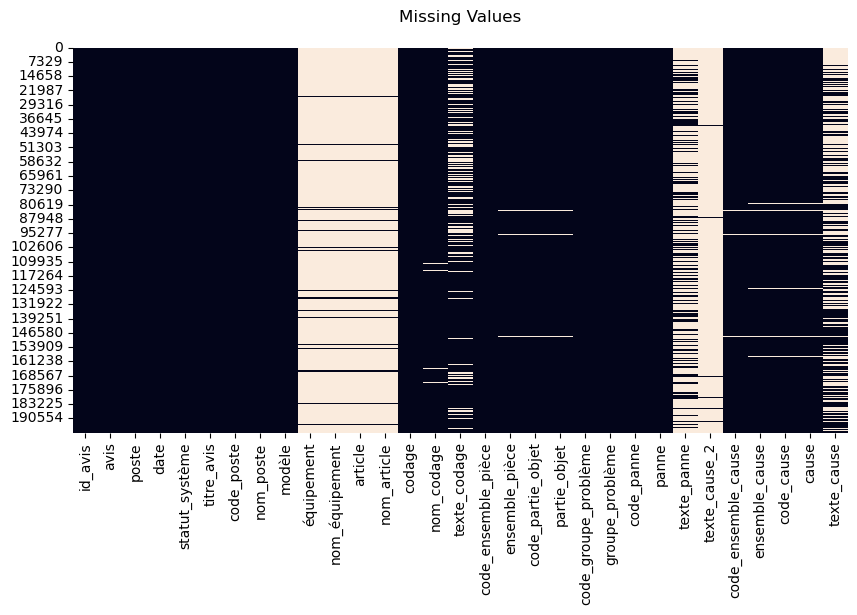

In [6]:
# Représentation valeurs nulles
missing_values_hitmap(df)

# Sélection des lignes pertinentes
+ Code codage : 1-4
+ Modèles : T77, T78, T79
+ Code panne : supérieur ou égal à 60

In [7]:
# Ajout d'une colonne "code_poste_épuré" qui contient juste le modèle du tram + le code de la pièce affectée
df["code_poste_épuré"] = df["code_poste"].str.slice(0,3) + df["code_poste"].str.slice(5)

In [8]:
# Nom des colonnes
df_cols = df.columns
df_cols

Index(['id_avis', 'avis', 'poste', 'date', 'statut_système', 'titre_avis',
       'code_poste', 'nom_poste', 'modèle', 'équipement', 'nom_équipement',
       'article', 'nom_article', 'codage', 'nom_codage', 'texte_codage',
       'code_ensemble_pièce', 'ensemble_pièce', 'code_partie_objet',
       'partie_objet', 'code_groupe_problème', 'groupe_problème', 'code_panne',
       'panne', 'texte_panne', 'texte_cause_2', 'code_ensemble_cause',
       'ensemble_cause', 'code_cause', 'cause', 'texte_cause',
       'code_poste_épuré'],
      dtype='object')

In [9]:
# Copier le DF pour le retravailler + supprimer les avis en double
df_clean = df.drop_duplicates(subset="id_avis")

In [10]:
# On se débarasse des lignes non pertinentes pour l'analyse, c-à-d les modèles autres que T77, T78, et T79
df_clean = df_clean[df_clean["modèle"].isin(["T77", "T78", "T79"])]

# ainsi que les codes pannes >=060
df_clean = df_clean[df_clean["code_panne"]>60.0]

# Codage compris entre 1 et 4
df_clean = df_clean[df_clean["codage"].isin([1.0,2.0,3.0,4.0])]

In [11]:
# Nombre de valeurs uniques par colonne
for col in df_clean.columns:
    print(f"{col} : {df_clean[col].unique().size}")

id_avis : 87383
avis : 87237
poste : 6
date : 6432
statut_système : 9
titre_avis : 43020
code_poste : 31077
nom_poste : 1664
modèle : 3
équipement : 1726
nom_équipement : 44
article : 34
nom_article : 26
codage : 4
nom_codage : 5
texte_codage : 49531
code_ensemble_pièce : 91
ensemble_pièce : 94
code_partie_objet : 340
partie_objet : 356
code_groupe_problème : 25
groupe_problème : 18
code_panne : 73
panne : 79
texte_panne : 20112
texte_cause_2 : 1985
code_ensemble_cause : 96
ensemble_cause : 110
code_cause : 142
cause : 177
texte_cause : 24507
code_poste_épuré : 2529


# Outil diagnostic

In [12]:
# Regroupement de toutes les possibilités en fonction du poste
tree = df_clean[["nom_poste", 
                 "panne",
                 "partie_objet",
                 "ensemble_cause",
                 "cause"]].groupby(
                     by=["nom_poste",
                         "panne",
                         "partie_objet",
                         "ensemble_cause"], 
                     as_index=False).value_counts()

In [13]:
tree

,nom_poste,panne,partie_objet,ensemble_cause,cause,count
0,A1; Antenne Radio,Autre,Ensemble,Qualific. Radio - Aiguill. - Public Adre,Défectueux,1
1,A1; Antenne Radio,Chauffage Voyageurs,Ensemble,Qualific. Radio - Aiguill. - Public Adre,Défectueux,1
2,A1; Antenne Radio,Commande Aiguillage,Connecteur,Qualific. Radio - Aiguill. - Public Adre,Mauvais Contact,1
3,A1; Antenne Radio,Equipement Radio,Connecteur,Qualific. Radio - Aiguill. - Public Adre,Détaché,1
4,A1; Antenne Radio,Phoenix,Ensemble,Qualific. Radio - Aiguill. - Public Adre,Mauvais Contact,1
...,...,...,...,...,...,...
26955,WTN1; Résistance Chutrice Relais RTN V1,Autre,Résistance,Qualification Résistances,Interrompu,1
26956,WTN1; Résistance Chutrice Relais RTN V1,Lampes De Signalisation,Résistance,Qualification Résistances,Interrompu,2
26957,valideurs 00101,Tous Les Appareils De Perception,Ensemble,Qualification Apparaillage Pro-Data,Défectueux,2
26958,valideurs 00102,Un Appareil De Perception,Ensemble,Qualification Apparaillage Pro-Data,Défectueux,2


In [14]:
test1 = tree.loc[(tree["nom_poste"]=="ACC1; Accélérateur 135 Positions") 
                 & (tree["partie_objet"]=="Ensemble") 
                 & (tree["panne"]=="Chocs En Traction")]

In [15]:
test1

,nom_poste,panne,partie_objet,ensemble_cause,cause,count
189,ACC1; Accélérateur 135 Positions,Chocs En Traction,Ensemble,Qualific. Accélérateurs,Brûlé,331
190,ACC1; Accélérateur 135 Positions,Chocs En Traction,Ensemble,Qualific. Accélérateurs,Interrompu,24
191,ACC1; Accélérateur 135 Positions,Chocs En Traction,Ensemble,Qualific. Accélérateurs,Mauvais Contact,16
192,ACC1; Accélérateur 135 Positions,Chocs En Traction,Ensemble,Qualific. Accélérateurs,Soudé,14
193,ACC1; Accélérateur 135 Positions,Chocs En Traction,Ensemble,Qualific. Accélérateurs,Se Bloque Mécaniquement,9
194,ACC1; Accélérateur 135 Positions,Chocs En Traction,Ensemble,Qualific. Accélérateurs,Tourne fou,5
195,ACC1; Accélérateur 135 Positions,Chocs En Traction,Ensemble,Qualific. Accélérateurs,Cassé,3
196,ACC1; Accélérateur 135 Positions,Chocs En Traction,Ensemble,Qualific. Accélérateurs,Trop De Jeu,3
197,ACC1; Accélérateur 135 Positions,Chocs En Traction,Ensemble,Qualific. Accélérateurs,A Titre D'essai,2
198,ACC1; Accélérateur 135 Positions,Chocs En Traction,Ensemble,Qualific. Bogies 1 - 2 - 3 - 4 Ensemble,Défectueux,1


In [16]:
def liste_valeurs(variable_tram):
    """
    Cette fonction retourne une liste contenant les valeurs uniques d'une variable servant à diagnostiquer une avarie de tram.
    """
    return pd.DataFrame(tree[variable_tram].unique())

In [17]:
def diagnostic_panne(nom_poste, partie_objet, panne):
    """
    Cette fonction affiche les diagnostics possibles et leur probabilité en fonction de trois paramètres: 
    • nom_poste : str
        Dénomination du poste technique.
    • partie_objet : str
        La partie de l'objet affectée.
    • panne : str
        Dénomination de la panne décrite par le dispatch.
    """
    pd.options.mode.copy_on_write = True
    
    diagnostic = tree[(tree["nom_poste"]==nom_poste) 
                        & (tree["partie_objet"]==partie_objet) 
                        & (tree["panne"]==panne)]
    
    diagnostic.loc[:,"probabilité"] = (diagnostic["count"] / diagnostic["count"].sum())*100

    return diagnostic[["ensemble_cause", "cause", "probabilité"]].sort_values("probabilité", ascending=False)

In [18]:
diagnostic_panne("ACC1; Accélérateur 135 Positions", "Ensemble", "Chocs En Traction")

,ensemble_cause,cause,probabilité
189,Qualific. Accélérateurs,Brûlé,77.336449
190,Qualific. Accélérateurs,Interrompu,5.607477
199,Qualification Apparaill. Electr. Tram,Défectueux,4.205607
191,Qualific. Accélérateurs,Mauvais Contact,3.738318
192,Qualific. Accélérateurs,Soudé,3.271028
193,Qualific. Accélérateurs,Se Bloque Mécaniquement,2.102804
194,Qualific. Accélérateurs,Tourne fou,1.168224
195,Qualific. Accélérateurs,Cassé,0.700935
196,Qualific. Accélérateurs,Trop De Jeu,0.700935
197,Qualific. Accélérateurs,A Titre D'essai,0.467290


In [19]:
# Colonnes de texte
text_cols = ["titre_avis", "texte_codage", "texte_panne", "texte_cause", "texte_cause_2"]

In [20]:
for col in ["titre_avis", "texte_codage", "texte_panne", "texte_cause", "texte_cause_2"]:
    print(f"{col} : {df[col].str.len().max()}")

titre_avis : 40
texte_codage : 250.0
texte_panne : 40.0
texte_cause : 40.0
texte_cause_2 : 265.0


In [21]:
# Changer paramètres d'affichage pour capturer tous les caractères
pd.options.display.max_colwidth = 265

In [22]:
# Nombre de lignes par code codage
df_clean[["codage", "nom_codage"]].groupby("codage").value_counts()

codage  nom_codage                              
1.0     Voiture Poussée                              2003
2.0     Voiture Remplacée Sur Réseau                53369
3.0     Réparée Sur Réseau Sans Remplacement        17850
4.0     Message Disp. Vérification Fin De Servic    13887
Name: count, dtype: int64

In [23]:
codage = df_clean[text_cols][df_clean["codage"] == 4.0]

# Nettoyage des colonnes de texte libre

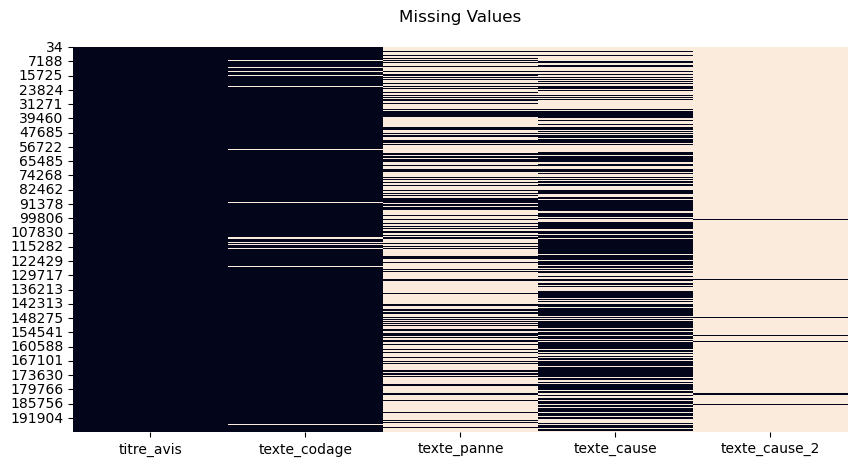

In [24]:
# Valeurs de texte libre manquantes (excepté titre avis)
missing_values_hitmap(df_clean[text_cols])

In [25]:
# Remplir le texte libre de valeurs vides -> transformation en données de style "string"
df_clean[text_cols] = df_clean[text_cols].fillna("")

## Nettoyage des colonnes de texte libre

In [26]:
# String de test
txt = """
à remplacer 04.09.2017 20:42:24 Salim Frej (68461) placer  N°791125 N° 791125
vervanging antenne en nadien mail naar vandewalp@mivb.irisnet.be ter bevestiging
Remplacer et placer 7900 le Valideur sur pied de maintenance afin de procéde au nettoyage des transactions. 
Téléphoner au 8299 ou envoyer un mail à DT_ITSM@stib.irisnet.be une fois l'operation effectuée
<Peter.Verschueren@mivb.brussels>30/11/22 30.11.2022 10:41:14 (81469) El Amrani Hakim <Hakim.ElAmrani@stib.brussels>
à rempl>à planifier > trop de jeux bobine de surtension 12     jeux latéral sur axe     folio : 11333000
te vervangen einde dienst 25u07    remplacer siege folio 2003771557    folio 21159000
switch A/pour folio n°99010103 modèle 7700
support sablière roue 3cassée  (folio 11168010) n° folio 2300
sinchronisser film     remplacer micro swicht (folio21156103)+ fusible
remplacer socket  n° folio s2300
schaerbeek@parking.brussels voire texte voir txt voir avis zie melding voir texte
zie foto zie tekst zie info zie melding Voir text Zie tkfh
SUBCAUSE :Zonder aanzet DETAILCAUSE :Opgelost door overste 19.11.2006 11:48:34 EDDY VAN DEN ABBEELE (VDABBEELEE)
Iris Notification   Remark Iris: éteint   Id Iris: 66196399 - 097   Vehicle: T7736   Obj Nb.: 5020   Driver: 72183   Cause Iris: Technical   Subcause Iris: Equipement embarqué   Detail Cause Iris: Afficheur de destination (PCC)
Iris Notification   Remark Iris: reset + porte 4 qui ne se ferme pas   Id Iris: 57766636 - 039   Vehicle: T7818   Obj Nb.: 7005   Driver: 67370   Cause Iris: Technical   Subcause Iris: Freins   Detail Cause Iris: Freinage automatique (BCM) Remark Ac
ôt de Schaerbeek. BCAUSE :Sans Démarrage TAILCAUSE :Attelage par exploitation 21-05-2018
Iris Notification   Id Iris : 32155263 - 097  7800 Vehicle : T7766   Obj Nb. : 8004   Driver  : 70255   Cause Iris: Matériel Roulant (Dép.Techn.)   Subcause Iris: Caisse extérieure   Detail Cause Iris: Rétroviseur extérieur Remark Actions list Iris:   1
9h48 10H56 2u56 24:12 16.15
Écran phoenix éteint dans les 2 postes, signalé ce matin en service 1 à 7h25?, noté en fin de service 20h30.    Retrer N°:193 et placer N°:685
t de defecte tram in vrijloop en zonder reizigers tot het station Hall oort waar hij wacht op L51 / L 540 / L. 7947 die uit de richting Zuidstatio komt.
T. 5486 T 7 #NAME? 65 km
AVROPER SCHOPER 125km
z4 4737060  plot soude r+ nettoyer   ET OK  zie tekst ----> (✿◡‿◡)
z4 fait a CUR pour remplacer connexion 030
moteur 5 brulé Z4 FAIT POUR BELGRADE àkm 
Z4 FAIT POUR ITT 1614219
Z4 :3434977
"""

In [27]:
# Patterns "spécifiques" = termes précis

s1 = r"SUBCAUSE|BCAUSE|TAILCAUSE" # BCAUSE et TAILCAUSE
s2 = r"Iris\s*Notification\s" # Iris Notification (nombre d'espace variable)
s3 = r"Remark\s*Iris" # Iris Notification (nombre d'espace variable)
s4 = r"Id\s*Iris\s*\:\s*\d+\s*\-\s*\d+" # Id Iris (nombre d'espace variable)
s4 = r"Vehicle\s*\:\s*T\d+" # Vehicle Id (nombre d'espace variable)
s5 = r"Obj\s*Nb\s*\.\s*\:\s\d+" # Obj Nb. (nombre d'espace variable)
s6 = r"Driver\s*\:\s*\d+" # Driver (nombre d'espace variable)
s7 = r"Cause\s*Iris|Subcause\s*Iris|Detail\s*Cause\s*Iris" # Cause Iris, Subcause Iris, Detail Cause Iris
s8 = r"n°\s*folio\s*[a-z]\d+|n°\s*folio\s*\d+|folio\s*\d+" # référence à "folio"
s9 = r"[A-Z]+OPER" # Références aux opérateurs des dépôts
s10 = r"[Vv]oir[e]*\s\w+" # voir + mot suivant avec variantes de "voir"
s11 = r"[Zz]ie\s\w+" # zie + mot suivant avec variantes de "zie"
s12 = r"\(\✿\◡\‿\◡\)" 
s13 = r"[Zz]4\s\w+\s\w+\s\w+|[Zz]4\s*\:\s*\d+" # référence aux Z4 + mots adjacents
s14 = r"[Zz]4" # référence aux z4
s15 = r"뉐藛켨प픰प噸"

specific = [s1, s2, s3, s4, s5, 
            s6, s7, s8, s9, s10,
            s11, s12, s13, s13, s14,
            s15]

In [28]:
# Patterns "génériques" = modèles de pattern

g1 = r"\d+\.\d+\.\d+|\d+\/\d+\/\d+|\d+\-\d+\-\d+" # dates de différents formats
g2 = r"\d+\:\d+\:\d+|\d+\:\d+|[0-3][0-9]\.\d{2}|\d{1,2}[hu]\d{1,2}" # heures de différents formats
g3 = r"\(\d+\)" # nombres entre parenthèses = (#) -> peu importe le nombre de chiffres
g4 = r"N\°\s*\d+|N\°\s*\:\s*\d+" # numéros explicités aux formats "N°#", "N° #" et "N°"
g5 = r"[a-zA-Z_]+\@\w+\.irisnet\.be" # adresses email au format x@x.iris.be -> x = n'importe quel nombre de caractères alphabétiques et "_"
g6 = r"\w+\.\w+@\w+.brussels" # adresses email au format x.x@x.brussels -> x = n'importe quel nombre de caractères alphabétiques et "_"
g8 = r"[a-zA-Z_]+\@parking.brussels" # adresses email au format x@parking.brussels
g7 = r"([A-Z][a-z]+(?=\s[A-Z])(?:\s[A-Z][a-z]+)+)" # noms et prénoms = une séquence de plusieurs mots commençant par une majuscule
g8 = r"([A-Z]+(?=\s[A-Z])(?:\s[A-Z]+)+)" # noms et prénoms entièrement en majuscule
g9 = r"\s\b(?!7700|7800|7900\b)\d+" # nombres excepté 7700, 7800 et 7900
g10 = r"L\s*\d+|L\.\s*\d+" # référence aux véhicules L#
g11 = r"T\s*\d{2,}|T\.\s*\d{2,}" # référence aux véhicules T##
g12 = r"\w+\s*km" # références à km 

generic = [g1, g2, g3, g4, g5, 
           g6, g7, g8, g9, g10,
           g11, g12]

In [29]:
# Code pour tester les patterns
print(re.findall(s13, txt))

['z4 fait a CUR', 'Z4 FAIT POUR BELGRADE', 'Z4 FAIT POUR ITT', 'Z4 :3434977']


In [30]:
# Supprimer patterns spécifiques et génériques
for col in text_cols:
    for pat in specific:
        df_clean[col] = df_clean[col].str.replace(pat, "", regex=True)

In [31]:
# Supprimer patterns spécifiques et génériques
for col in text_cols:
    for pat in generic:
        df_clean[col] = df_clean[col].str.replace(pat, "", regex=True)

In [32]:
# Supprimer signes spéciaux
for col in text_cols:
    df_clean[col] = df_clean[col].str.replace(r"[;:+-.\\/=><()_ツ]", " ", regex=True)

In [33]:
# Ajouter une colonne contenant tout le texte libre
df_analyse = df_clean
df_analyse["texte_libre"] = df_analyse[["titre_avis", "texte_codage", "texte_panne", "texte_cause", "texte_cause_2"]].agg(" ".join, axis=1)

In [ ]:
# test : regex pour enlever les espaces multiples
string3 = "My friend  Bob   loves          bananas."
patt = r"\s{2,}"
print(re.sub(patt, " ", string3))

My friend Bob loves bananas.


In [59]:
# Enlever les espaces en début et fin de chaque ligne
df_analyse["texte_libre"] = df_analyse["texte_libre"].str.strip()

# Enlever les espaces multiples entre les mots
df_analyse["texte_libre"] = df_analyse["texte_libre"].str.replace(r"\s{2,}", " ", regex=True)

In [34]:
# Changer l'option d'affichage afin de s'assurer que la conversion vers une chaine de caractères prenne en compte tous les caractères
pd.options.display.max_colwidth = df_analyse["texte_libre"].str.len().max()

# Création d'une liste de mots vides (stopwords)

In [35]:
from nltk.corpus import stopwords

In [36]:
belgian_sw = set(stopwords.words("french") + stopwords.words("dutch"))
stop_w = list(belgian_sw)

# Test avec sklearn

On souhaite trouver les unigrammes, bigrammes, et trigrammes présents dans la colonne concaténée (= toutes les colonnes de texte libre).
Ensuite, on doit mesurer les co-occurences de ces derniers.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
# Échantillon test
tram = df_analyse["texte_libre"]

In [39]:
# Vecteur vocabulaire, aucune limite afin de compter TOUS les mots uniques, peu importe leur nombre d'apparition
# Ne sont exclus que les mots vides ("stop words")

vect_voc = CountVectorizer(stop_words=stop_w, 
                           token_pattern=r"\b[A-Za-z]+\d*\b")  # Pattern pour tous les mots, également les mots attaché à des chiffres

X_voc = vect_voc.fit_transform(tram)

In [ ]:
# Nombre de mots uniques + liste des mots repérés par le vecteur
print(len(vect_voc.vocabulary_))
vect_voc.vocabulary_

19490


{'schokken': 15674,
 'traktie': 17526,
 'deuren': 4850,
 'buiten': 2610,
 'dienst': 4994,
 'oog': 11923,
 'deur': 4823,
 'idem': 8236,
 'dito': 5154,
 'problemen': 13552,
 'ontgrendeling': 11880,
 'rss': 15348,
 'vervangen': 18561,
 'buitenspiegel': 2633,
 'a': 0,
 'lange': 9602,
 'rem': 14347,
 'tractie': 17429,
 'deurdeel': 4847,
 'gelost': 7404,
 'colonne': 3463,
 'portea': 13168,
 'costas': 3970,
 'kolom': 9339,
 'gebroken': 7304,
 'dem': 4605,
 'ltb': 10180,
 'appl': 1017,
 'patin': 12576,
 'lmv': 9973,
 'porte': 13158,
 'ferme': 6610,
 'chocs': 3203,
 'freinage': 7026,
 'f': 6402,
 'remplace': 14438,
 'kb': 9144,
 'openen': 12022,
 'poste': 13352,
 'intervenu': 8781,
 'ligne': 9868,
 'sans': 15582,
 'rempl': 14429,
 'rel': 14319,
 'mauvais': 10480,
 'contact': 3756,
 'commane': 3493,
 'aiguillage': 642,
 'fusible': 7183,
 'fw1': 7200,
 'gesmolten': 7531,
 'kabelsa': 9079,
 'ene': 5891,
 'v': 18118,
 'p': 12329,
 'ok': 11667,
 'lacapplications': 9524,
 'patins': 12591,
 'frein': 7

On doit établir des cotes d'exclusion des mots, c'est-à-dire des seuils pour les mots trop rares et pour les mots trop fréquents.  
Dans les deux cas, ces mots sont considérés comme "inutiles". Dans le premier cas, des mots qui apparaissent trop rarement ne nous permettent pas d'en tirer assez de sens et contexte. Dans l'autre cas, des mots à fréquence trop élevée faussent également la compréhension du texte. 

Ci-dessous, on établit quelques variables liées au nombre de mots utilisés dans le dataframe. On aimerait obtenir le total de lignes, de mots, etc.
Dans la fréquence des mots rares et courants, on utilise des valeurs arbitraires pour déterminer la rareté et l'abondance d'un terme - au vu des valeurs utilisées ici, on estime qu'un terme abondant sera 4 fois plus fréquent qu'un terme normal et un terme rare sera 5 fois plus rare qu'un terme normal.

On utilisera les cotes d'exclusion pour les nombres minimum et maximum de lignes où le terme apparait, ce qui n'égale pas forcément le total réel d'apparition du terme, qui serait en théorie un peu supérieur au nombre de lignes (par exemple dans le cas où un terme apparait deux fois dans la même ligne).

In [63]:
# Établir une cote d'exclusion du vocabulaire = éviter les mots trop rares ou trop fréquents

# total de lignes dans le dataframe (après exclusion des lignes peu pertinentes) 
tl = len(tram) 

# total de mots uniques repérés par le vecteur
tmu = len(vect_voc.vocabulary_)

# total théorique de mots = nombre d'espaces + 1 pour chaque ligne
ttm = sum([np.char.count(s, " ")+1 for s in tram])

# total théorique de mots "approuvés" = nombre de mots repérés par le vecteur
ttma = vect_voc.fit_transform(tram).sum()

# moyenne de mots par ligne = total théorique de mots / total de lignes
mml = round(ttm / tl)

# fréquence théorique des mots = total théorique de mots / total mots uniques
ftm = round(ttm / tmu)

# fréquence théorique des mots rares = fréquence théorique des mots / 5 -> soustraire 1 à ce résultant pour la "cote d'exclusion de rareté"
ftmr = round(ftm/5)
cer = ftmr-1

# fréquence théorique des mots abondants = fréquence théorique des mots * 4 -> additionner 1 à ce résultat pour la "cote d'exclusion d'abondance"
ftmc = round(ftm*4)
cea = ftmc+1


### Unigrammes

In [99]:
# Vecteur des unigrammes d'intérêt (= 1 mot, à l'exclusion des mots rares et abondants)
unigram_vect = CountVectorizer(
                               stop_words=stop_w,
                               token_pattern=r"\b[A-Za-z]+\d*\b",
                               max_df=cea,
                               min_df=cer
                               )

X_unigram = unigram_vect.fit_transform(tram)

In [100]:
# Nombre d'unigrammes pertinents
print(len(unigram_vect.vocabulary_))
# unigram_vect.vocabulary_

2469


In [ ]:
def ngram_occurrence(vector, count_array):
    """
    Cette fonction accepte un vecteur et un array d'occurrences et les transforme en dictionnaire dont les clés représentent les ngrammes capturés  
    par le vecteur et dont les valeurs sont les occurrences de chaque ngramme.  
    • vector : vecteur CountVectorizer sklearn
    • count_array : array obtenu avec la méthode `fit_transform` de sklearn
    """
    ngram_list = vector.get_feature_names_out() # n-grammes
    ngram_count = np.asarray(count_array.sum(axis=0))[0] # décompte pour chaque n-gramme
    return dict(zip(ngram_list, ngram_count)) # retourne la jointure des n-grammes et de leur décompte en dictionnaire

In [109]:
# Obtenir les occurrences de chaque bigramme
unigram_occ = ngram_occurrence(unigram_vect, X_unigram)
unigram_occ

{'a1': 23,
 'a3': 15,
 'a4': 18,
 'a5': 14,
 'aanduider': 22,
 'aangemaakt': 10,
 'aangepast': 11,
 'aangetrokken': 14,
 'aankomst': 76,
 'aanmelding': 127,
 'aanrijding': 23,
 'aanslag': 25,
 'aanslagen': 11,
 'aanvraag': 147,
 'absence': 33,
 'absent': 19,
 'acc12': 40,
 'acca': 10,
 'accb': 11,
 'accelerateur': 33,
 'acceleration': 14,
 'accelere': 18,
 'accident': 47,
 'accouplement': 34,
 'accs': 16,
 'achter': 18,
 'achteruit': 12,
 'achteruitloop': 24,
 'act': 29,
 'actif': 41,
 'active': 14,
 'actu': 43,
 'actuateur': 47,
 'actuateurs': 25,
 'actuatoren': 73,
 'adio': 16,
 'affichage': 59,
 'affiche': 64,
 'afficheu': 10,
 'afficheurs': 25,
 'afg': 100,
 'afgebrand': 21,
 'afgebroken': 136,
 'afgen': 15,
 'afgenomen': 28,
 'afgerold': 19,
 'afgerukt': 156,
 'afgeschakeld': 56,
 'afgesloten': 102,
 'afgevallen': 13,
 'afgezet': 20,
 'afin': 32,
 'afschakeling': 72,
 'aftakdoos': 14,
 'ag': 26,
 'age': 19,
 'agents': 23,
 'agit': 10,
 'agression': 19,
 'aide': 21,
 'aig': 18,
 'a

In [ ]:
def ngram_cooc(count_array):
    """
    Cette fonction accepte un array d'occurrences des ngrammes obtenu avec la méthode `fit_transform` de sklearn et retourne  
    un array de cooccurrences après avoir transposé une version de l'array, puis multiplié les deux versions de l'array.
    """
    count_array[count_array > 0] = 1
    ngram_cooc = (count_array.T * count_array) # on multiplie l'array par une version transposée de lui-même
    ngram_cooc.setdiag(0) # on fait passer la ligne en 

In [66]:
# Co-occurrences des unigrammes pertinents
X_unigram[X_unigram > 0] = 1 # évite les "fausses" co-occurrences induites par le texte ?
uni_coocc = (X_unigram.T * X_unigram)
uni_coocc.setdiag(0)
print(uni_coocc.todense())

[[0 0 2 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [2 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### N-grammes
Pour les n-grammes, on utilise une méthode suivant la logique multiplicative : puisque qu'un n-gramme représente `unigramme * n`, pour l'exclusion des n-grammes, on multiplie la fréquence théorique des mots rares et la fréquence théorique des mots abondants par n. 

Cette méthode est simpliste, et ne suit pas la théorie des n-grammes. En théorie, le nombre maximum de n-grammes est le nombre d'unigrammes exposé à la puissance n.  
Cette approche théorique relève de la combinatoire - elle représente le total de combinaisons possibles en fonction de la liste de mots uniques que l'on peut cobiner et le nombre de mots à choisir pour chaque combinaison. Ainsi, si on dispose d'une liste de 10 mots distincts et que l'on veut trouver tous les bigrammes possibles, on obtient les combinaisons en élevant 10 au carré = 100 combinaisons possibles.  
Bien que ce soit correct mathématiquement, dans la nature tous les mots ne se combinent pas avec n'importe quel autre mot, les colocations ne se forment qu'avec certains mots, qui ne sont en outre pas forcément prédéfinis, c'est-à-dire que cette liste n'est pas figée.  

En NLP, pour contrer ce foisonnement, on utiliserait un corpus existant qui sert à juger si un n-gramme est pertinent ou pas, soit s'il existe dans le langage naturel. Pour notre projet, on ne dispose pas d'un tel corpus, et puisque la réparation de trams est spécifique, on ne peut pas simplement utiliser un corpus général.  
D'autre part, le langage utilisé dans la base dont on dispose ne suit pas les règles grammaticales usuelles :
+ les phrases ne commencent pas par des majuscules et ne se terminent pas par des points
+ utilisation abusive d'abréviations
+ format de "note"

In [93]:
# Vecteur des trigrammes (= combo de 3 mots)
trigram_vect = CountVectorizer( 
                               ngram_range=(3,3),
                               stop_words=stop_w,
                               token_pattern=r"\b[A-Za-z]+\d*\b",
                               max_df=cea*3,
                               min_df=cer
                               )

X_trigram = trigram_vect.fit_transform(tram)

In [94]:
# Nombre de trigrammes
print(len(trigram_vect.vocabulary_))

# Liste de trigrammes
# trigram_vect.vocabulary_

4324


In [112]:
# Obtenir les occurrences de chaque bigramme
trigram_occ = ngram_occurrence(trigram_vect, X_trigram)
# trigram_occ

In [92]:
# Matrice de cooccurrences des trigrammes
X_trigram[X_trigram > 0] = 1 
tri_coocc = (X_trigram.T * X_trigram)
tri_coocc.setdiag(0)
print(tri_coocc.todense())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Vecteur des bigrammes (= combo de 2 mots)
bigram_vect = CountVectorizer(
                              ngram_range=(2,2),
                              token_pattern=r"\b[A-Za-z]+\d*\b",
                              stop_words=stop_w,
                              max_df=cea*2,
                              min_df=cer*2
                              )

X_bigram = bigram_vect.fit_transform(tram)

In [90]:
# Nombre de bigrammes 
print(len(bigram_vect.vocabulary_))

# Liste des bigrammes
# bigram_vect.vocabulary_

2606


In [114]:
# Obtenir les occurrences de chaque bigramme
bigram_occ = ngram_occurrence(bigram_vect, X_bigram)
# bigram_occ

In [95]:
# Matrice de cooccurrences des bigrammes
X_bigram[X_bigram > 0] = 1 
bi_coocc = (X_bigram.T * X_bigram)
bi_coocc.setdiag(0)
print(bi_coocc.todense())

[[ 0  1  1 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  1]
 ...
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ... 10  0  0]
 [ 0  0  1 ...  0  0  0]]


https://stackoverflow.com/questions/20574257/constructing-a-co-occurrence-matrix-in-python-pandas

https://stackoverflow.com/questions/45426215/how-to-remove-stop-phrases-stop-ngrams-multi-word-strings-using-pandas-sklearnµ

https://stackoverflow.com/questions/35562789/how-do-i-calculate-a-word-word-co-occurrence-matrix-with-sklearn

### Décompte des n-grams